In [1]:
import h5py
import seaborn as sns
from moseq2_detectron_extract.io.annot import default_keypoint_names, default_keypoint_connection_rules
import matplotlib.pyplot as plt

In [2]:
kp_markers = {
    'Nose': '>',
    'Left Ear': '^',
    'Right Ear': 'v',
    'Neck': '<',
    'Left Hip': '3',
    'Right Hip': '4',
    'TailBase': '8',
    'TailTip': 'P'
}

In [3]:
h5 = h5py.File(r"E:\moseq_raw_data\detectron2_testing_full\session_20200915132521_top-score-vote\results_00.h5", 'r')

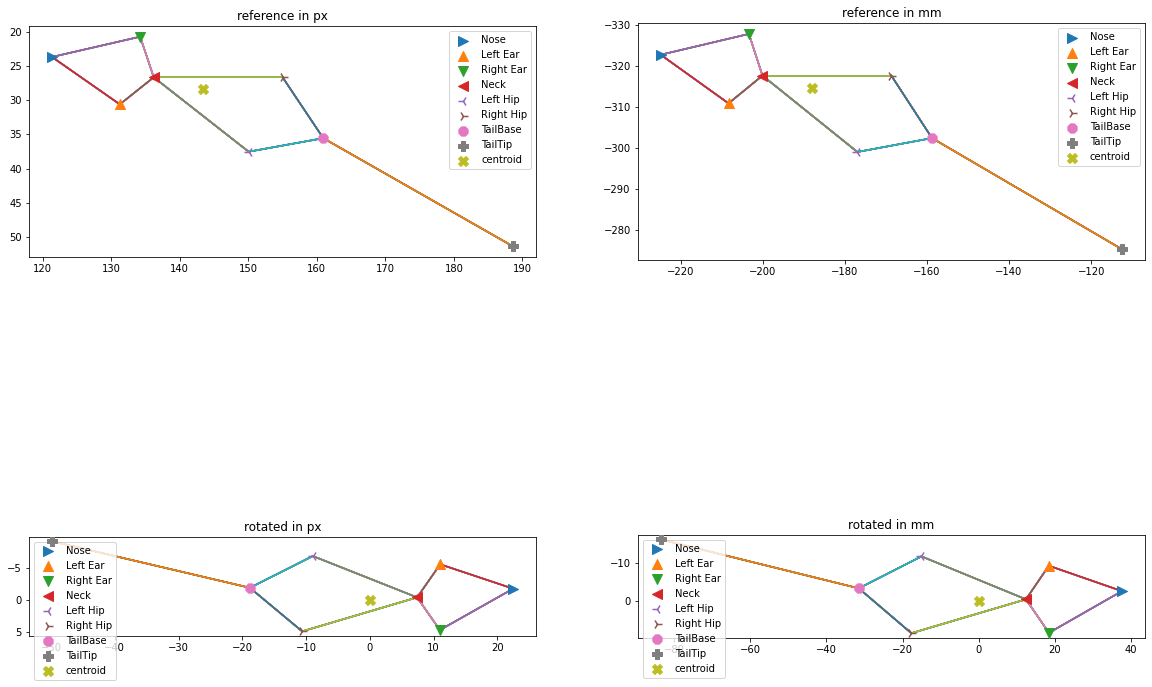

In [4]:
systems = ['reference', 'rotated']
units = ['px', 'mm']
frame_idx = 1000

fig, axs = plt.subplots(2, 2, figsize=(20,15))
for si, cs in enumerate(systems):
    for ui, un in enumerate(units):
        ax = axs[si, ui]
        for kp in default_keypoint_names:
            for rule in default_keypoint_connection_rules:
                x1 = h5[f'/keypoints/{cs}/{rule[0]}_x_{un}'][frame_idx]
                y1 = h5[f'/keypoints/{cs}/{rule[0]}_y_{un}'][frame_idx]
                x2 = h5[f'/keypoints/{cs}/{rule[1]}_x_{un}'][frame_idx]
                y2 = h5[f'/keypoints/{cs}/{rule[1]}_y_{un}'][frame_idx]
                ax.plot([x1, x2], [y1, y2], zorder=0)
                
            x = h5[f'/keypoints/{cs}/{kp}_x_{un}'][frame_idx]
            y = h5[f'/keypoints/{cs}/{kp}_y_{un}'][frame_idx]
            ax.scatter(x, y, marker=kp_markers[kp], label=kp, s=100, zorder=100)
            
        if cs == 'reference':
            if un == 'px':
                x = h5['/scalars/centroid_x_px'][frame_idx]
                y = h5['/scalars/centroid_y_px'][frame_idx]
            else:
                x = h5['/scalars/centroid_x_mm'][frame_idx]
                y = h5['/scalars/centroid_y_mm'][frame_idx]
            ax.scatter(x, y, marker='X', label='centroid', s=100, zorder=100)
            
        elif cs == 'rotated':
            ax.scatter([0], [0], marker='X', label='centroid', s=100, zorder=100)
                
        ax.set_title(f'{cs} in {un}')
        ax.set_aspect('equal')
        ax.legend()
        ax.invert_yaxis()
        

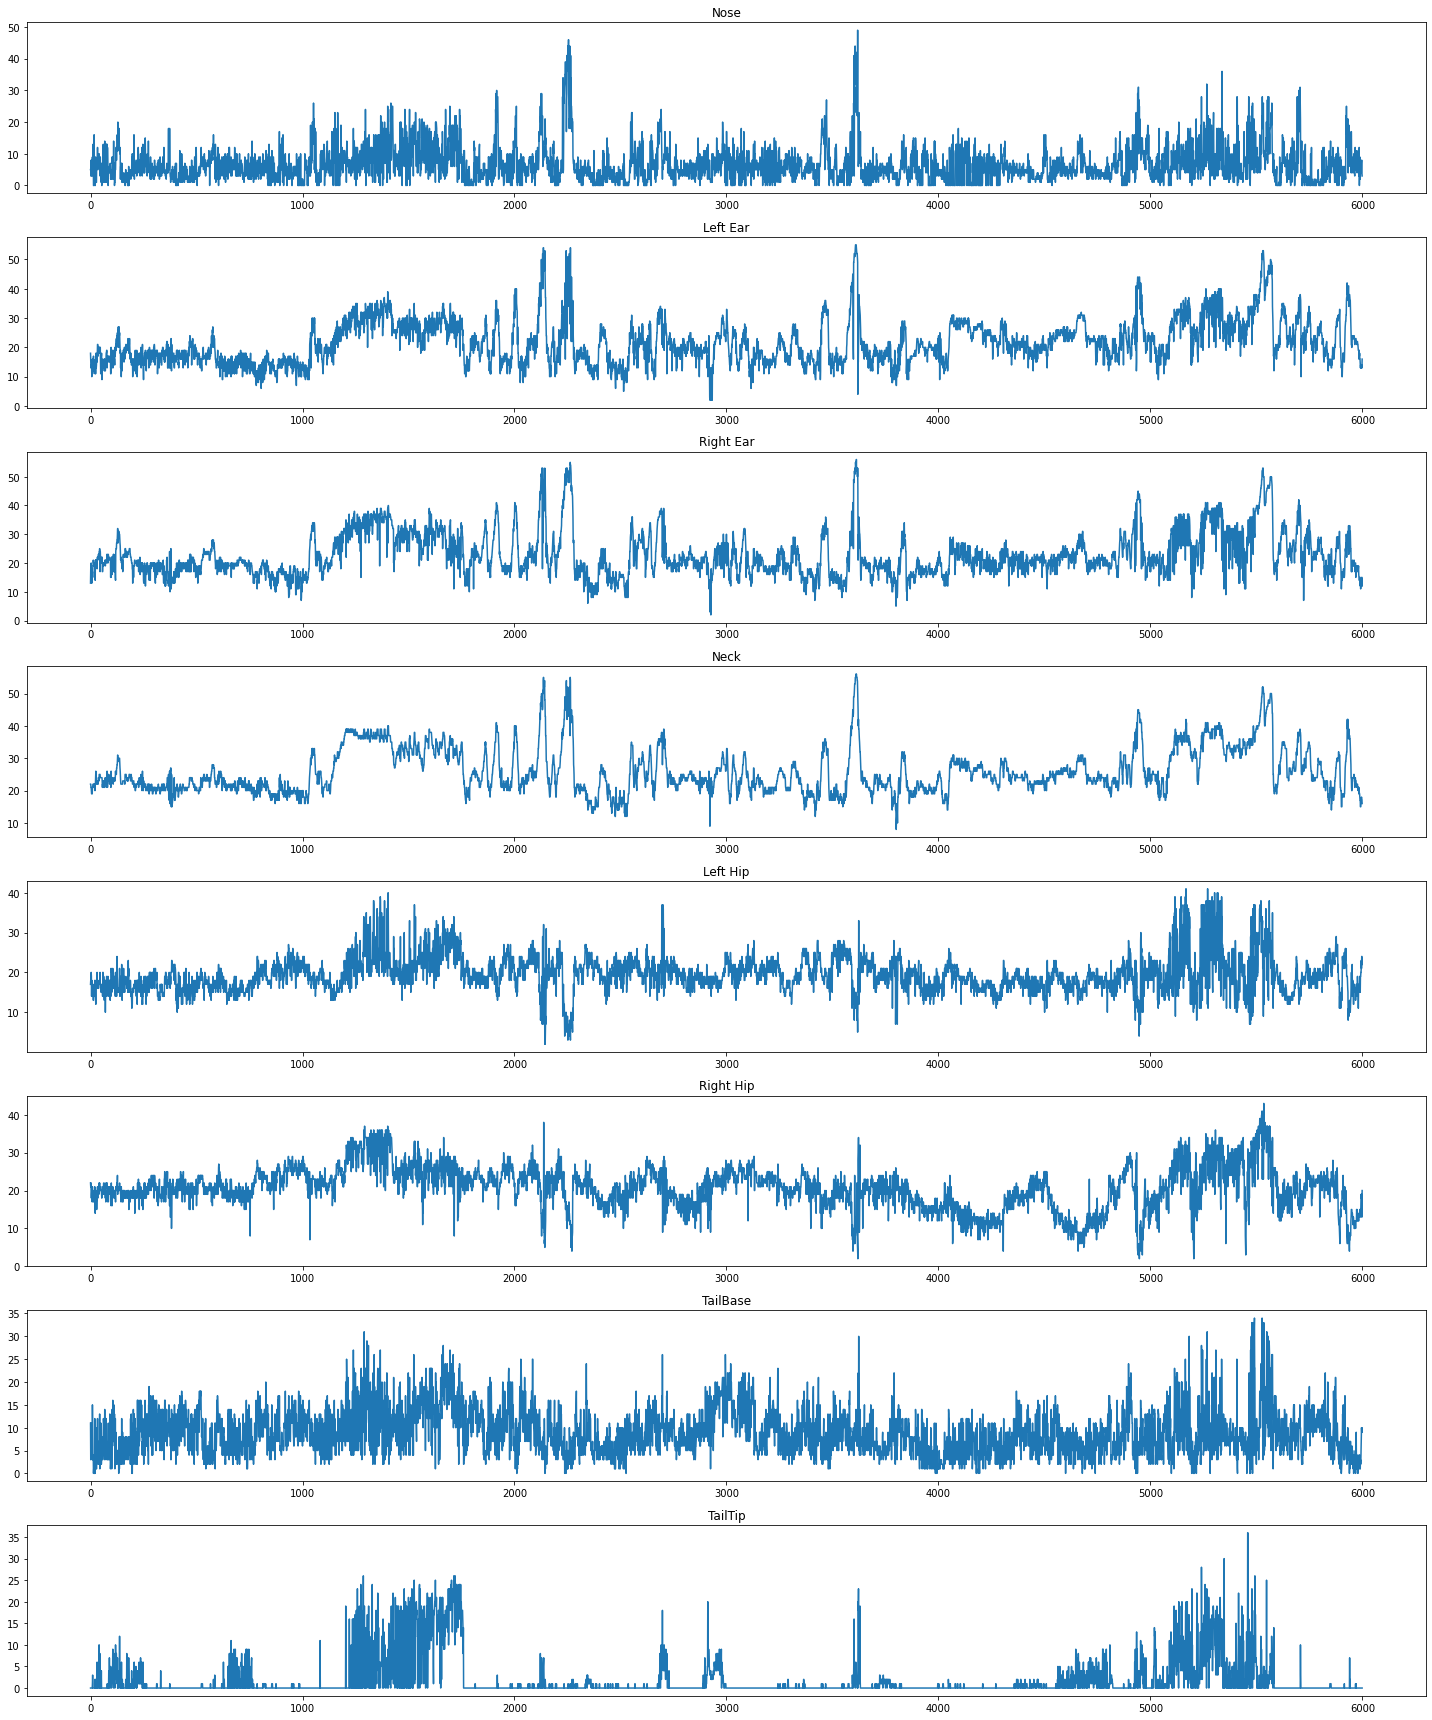

In [5]:
fig, axs = plt.subplots(len(default_keypoint_names), 1, figsize=(20,24))
for kpi, kp in enumerate(default_keypoint_names):
    axs[kpi].plot(h5[f'/keypoints/reference/{kp}_z_mm'][()])
    axs[kpi].set_title(kp)
fig.tight_layout()
    